<div style="line-height:0.5">
<h1 style="color:#D68910"> Scipy basics 3 </h1>
<h4> Deal with functions. </h4>
</div>
<div style="margin-top: -20px;">
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3> optimize() + detrend()
</span>
</div>

<h2 style="color:#D68910"> Example #1 </h2>

<h3 style="color:#D68910"> Recap: </h3>
<div style="margin-top: -20px;">
Six-Hump Camel test function used in optimization and computational mathematics. <br>
F(x,y) has multiple local minima and two global minima.

$
f(x,y) = \displaystyle (4 - 2.1x^2 + \frac{x^4}{3})x^2 + xy + \displaystyle (4y^2 - 4)y^2
$

Goal: Find a global minimum (there is more than one, each with the same value of the objective function) and at least one other local minimum.
</div>

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [18]:
def funct_sixhump(x):
    """ Compute the value of the Six-Hump Camel Back function. """
    return (
        (4 - 2.1 * x[0] ** 2 + x[0] ** 4 / 3) * x[0] ** 2
        + x[0] * x[1]
        + (-4 + 4 * x[1] ** 2) * x[1] ** 2)

In [19]:
""" Grid for plotting. """
xlim = [-2, 2]
ylim = [-1, 1]
x = np.linspace(*xlim)
y = np.linspace(*ylim)
xg, yg = np.meshgrid(x, y)

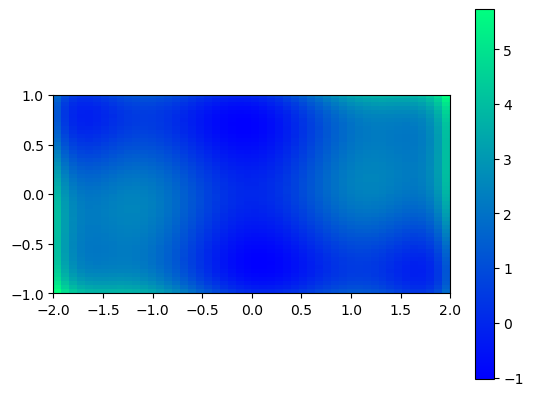

In [20]:
# Plot
plt.figure()
plt.imshow(funct_sixhump([xg, yg]), extent=xlim + ylim, origin="lower", cmap='winter')
plt.colorbar()
plt.show()

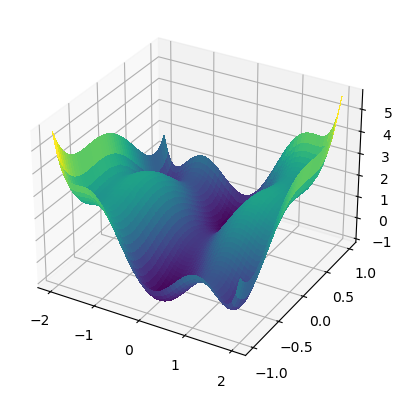

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(
    xg,
    yg,
    funct_sixhump([xg, yg]),
    rstride=1,
    cstride=1,
    cmap=plt.cm.viridis,
    linewidth=0,
    antialiased=False,
)

In [22]:
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.set_title("Six-hump Camelback function")

Text(0.5, 0.92, 'Six-hump Camelback function')

In [23]:
# local minimization
res_local = sp.optimize.minimize(funct_sixhump, x0=[0, 0])

# global minimization
res_global = sp.optimize.differential_evolution(funct_sixhump, bounds=[xlim, ylim])

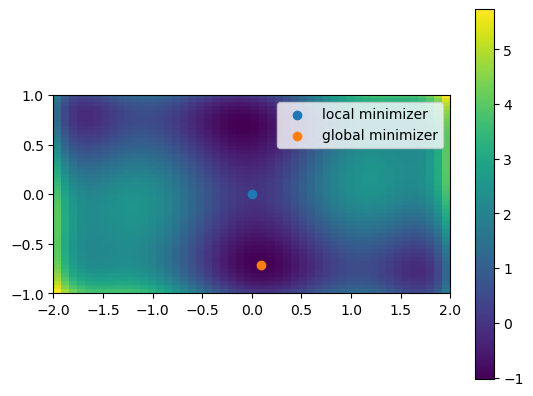

In [24]:
plt.figure()
# Show the function in 2D
plt.imshow(funct_sixhump([xg, yg]), extent=xlim + ylim, origin="lower")
plt.colorbar()
# Mark the minima
plt.scatter(res_local.x[0], res_local.x[1], label="local minimizer")
plt.scatter(res_global.x[0], res_global.x[1], label="global minimizer")
plt.legend()
plt.show()

<h2 style="color:#D68910"> Example #2 </h2>

In [14]:
x = np.arange(-10, 10, 0.1)

def parabolic_sine(x):
    return x**2 + 10 * np.sin(x)

In [17]:
# Constrain optimization
xmin_local = sp.optimize.fminbound(parabolic_sine, 0, 10)
# Global optimization
grid = (-10, 10, 0.1)
xmin_global = sp.optimize.brute(parabolic_sine, (grid,))

print(f"Local minimum found {xmin_local}")
print(f"Global minima found {xmin_global}")

Local minimum found 3.8374671194983834
Global minima found [-1.30641113]


In [16]:
root = sp.optimize.root(parabolic_sine, 1)  # 1 => initial guess
print(f"First root found {root.x}")
root2 = sp.optimize.root(parabolic_sine, -2.5)
print(f"Second root found {root2.x}")

First root found [0.]
Second root found [-2.47948183]


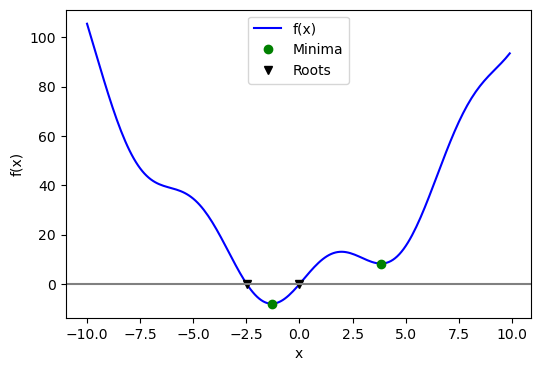

In [18]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

# Plot the function
ax.plot(x, parabolic_sine(x), "b-", label="f(x)")

# Plot the minima
xmins = np.array([xmin_global[0], xmin_local])
ax.plot(xmins, parabolic_sine(xmins), "go", label="Minima")

# Plot the roots
roots = np.array([root.x, root2.x])
ax.plot(roots, parabolic_sine(roots), "kv", label="Roots")

# Decorate the figure
ax.legend(loc="best")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.axhline(0, color="gray")
plt.show()

<h2 style="color:#D68910"> Example #3 </h2>

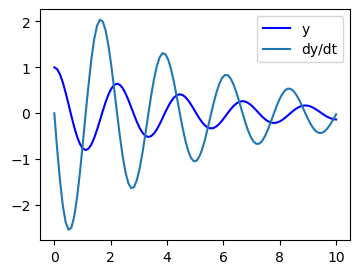

In [6]:
m = 0.5     # mass [kg] 
k = 4       # spring constant [N/m]
c = 0.4     # damping coefficient [s/m]

# Calculate damping ratio
zeta = c / (2 * m * np.sqrt(k / m))  

# Calculate natural frequency
omega = np.sqrt(k / m)

def f(t, z, zeta, omega):
    """  Define ODE function, State vector z contains [y, dy/dt]. """ 
    return (z[1], -zeta * omega * z[1] - omega**2 * z[0]) 

# Set a time range
t_span = (0, 10)

# Discrete time points to evaluate
t_eval = np.linspace(*t_span, 100)  

# Define the initial conditions 
z0 = [1, 0]  

# Integrate ODE 
res = sp.integrate.solve_ivp(f, t_span, z0, t_eval=t_eval, args=(zeta, omega), method="LSODA")

###### Display all results
plt.figure(figsize=(4, 3))
plt.plot(res.t, res.y[0], label="y", color="blue")
plt.plot(res.t, res.y[1], label="dy/dt")
plt.legend(loc="best")
plt.show()

<h2 style="color:#D68910"> Example #4</h2>

In [7]:
t = np.linspace(0, 5, 100)
rng = np.random.default_rng()
x = t + rng.normal(size=100)

In [8]:
""" Exploit 'detrend' module to remove any linear trend from an array. 
It is commonly used in signal processing to focus on the shorter-term fluctuations in the data rather than long-term trends.
"""
x_detrended = sp.signal.detrend(x)
x_detrended

array([-0.32775972,  1.63682151,  1.2520656 , -0.47962122, -0.40753968,
       -0.43448055,  0.84980934, -0.87304273,  0.4150362 ,  0.35226776,
       -2.23416345, -0.91718502, -1.0412524 ,  1.12496533,  0.14575011,
       -0.08321628,  0.81160792, -0.43893354,  0.47843589, -1.13282924,
        0.4215395 , -2.96853286,  0.30039328,  0.02172142, -1.14831731,
       -0.83389532,  1.33603683,  0.61651601,  2.19727904,  1.13185175,
       -1.14668733, -2.18026437,  0.57568696, -0.18184938,  0.86419274,
        2.01879148,  0.13411442,  1.23753717, -1.74229169, -1.44100894,
        0.46311701, -0.63078338,  0.03419127,  0.79892298,  1.2163589 ,
        0.98729005, -0.37892075,  1.5420035 , -1.33663177, -1.44109365,
        0.7944656 ,  1.59927127,  0.4069061 ,  0.46472408, -0.25082025,
       -0.30397249, -1.12791947,  2.16257271,  0.82122821, -0.17364793,
       -1.95372601, -0.77018651, -0.22567934,  0.813823  ,  0.1293747 ,
       -0.70355385, -0.90716217,  0.83212711, -0.10554539, -0.91

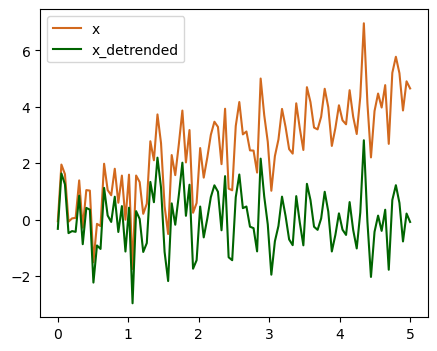

In [12]:
plt.figure(figsize=(5, 4))
plt.plot(t, x, label="x", color="chocolate")
plt.plot(t, x_detrended, label="x_detrended", color="darkgreen")
plt.legend(loc="best")
plt.show()